In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取输入图像
img = cv2.imread('./figs/pro3_road_sign_school_blurry.jpg', cv2.IMREAD_GRAYSCALE)

In [84]:
# 设计结构元素，这里使用一个3x3的矩形结构元素
structuring_element1 = cv2.getStructuringElement(cv2.MORPH_RECT, (4, 4))
structuring_element2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4))

print(structuring_element1, structuring_element2)

[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]] [[0 0 1 0]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


In [85]:
# 定义迭代算法进行图像锐化
def sharpen_image(img, iterations, structuring_element):
    for _ in range(iterations):
        # 膨胀图像
        img = cv2.dilate(img, structuring_element1)
        # 腐蚀图像
        img = cv2.erode(img, structuring_element2)
        #img = cv2.addWeighted(img, 1.5, dilated, -0.5, 0)
    return img

In [86]:
# 应用算法进行10次迭代
sharpened_img = sharpen_image(img, 10, structuring_element)

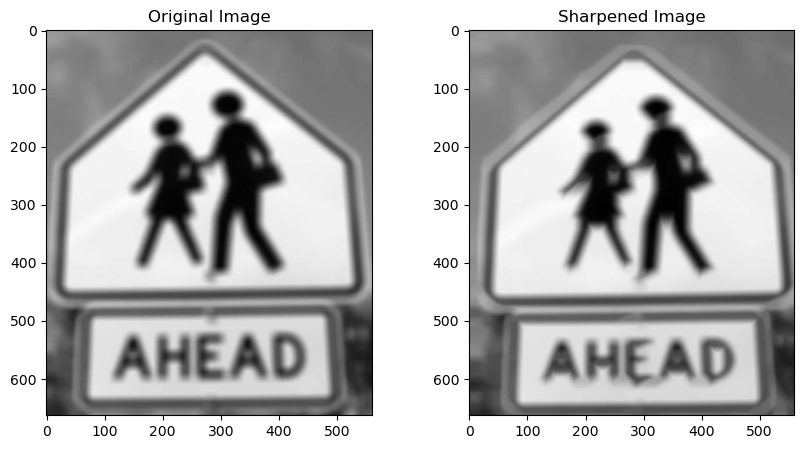

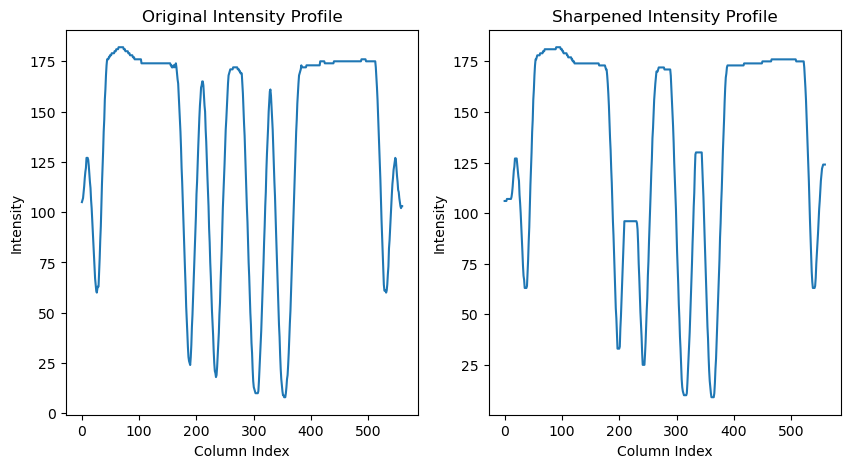

In [87]:
# 显示结果图像
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Sharpened Image')
plt.imshow(sharpened_img, cmap='gray')

plt.show()

# 获取第338行的强度轮廓
row = 338
original_profile = img[row, :]
sharpened_profile = sharpened_img[row, :]

# 绘制强度轮廓图
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Intensity Profile')
plt.plot(original_profile)
plt.xlabel('Column Index')
plt.ylabel('Intensity')

plt.subplot(1, 2, 2)
plt.title('Sharpened Intensity Profile')
plt.plot(sharpened_profile)
plt.xlabel('Column Index')
plt.ylabel('Intensity')

plt.show()

In [ ]:
# It shows a sharper result.